In [1]:
import os
cwd = os.getcwd()

In [2]:
import sys
sys.path.insert(0, cwd + "/src")

In [3]:
from dendrotweaks.membrane.io.factory import MechanismFactory
import matplotlib.pyplot as plt

/home/roman/Documents/code/DendroTweaks/app/src


In [4]:
path_to_mod = os.path.join(cwd, "data", "mod")
path_to_python = os.path.join(cwd, "data", "mechanisms")
path_to_templates= os.path.join(cwd, "data", "templates")

factory = MechanismFactory(path_to_mod=path_to_mod, 
                           path_to_python=path_to_python, 
                           path_to_template=path_to_templates)

In [5]:
factory.list_archives()

Available archives in
/home/roman/Documents/code/DendroTweaks/app/src/data/mod/

├── Base/
│   └── Leak
├── Park_2019/
│   ├── Na
│   ├── KCa
│   ├── Kv
│   ├── Ka
│   ├── CaHVA
│   ├── Km
│   └── CaLVA
└── Park_test/
    ├── Na
    └── Kv


In [6]:
channel_name="Na"
archive_name="Park_test"

In [7]:
path_to_python = factory._get_python_path(channel_name, archive_name)

In [8]:
factory._get_module_info(path_to_python)

('Na',
 'Na',
 '/home/roman/Documents/code/DendroTweaks/app/src/data/mechanisms/Park_test')

In [9]:
# Create a channel using the factory
channel = factory.create_channel(
    channel_name=channel_name,
    archive_name=archive_name,
    python_template_name="template_dd_new",
    load=False
)

READING
Split content into blocks:
    1 - TITLE
    1 - COMMENT
    1 - NEURON
    1 - UNITS
    1 - PARAMETER
    1 - ASSIGNED
    1 - STATE
    1 - BREAKPOINT
    1 - DERIVATIVE
    1 - INITIAL
    2 - FUNCTION
    1 - PROCEDURE
    0 - KINETIC
No unmatched content.

PARSING
Parsed TITLE block.
Parsed COMMENT block.
Parsed NEURON block.
Parsed UNITS block.
Parsed PARAMETER block.
Parsed ASSIGNED block.
Parsed STATE block.
Parsed BREAKPOINT block.
Parsed DERIVATIVE block.
Parsed INITIAL block.
Parsed FUNCTION block.
Parsed PROCEDURE block.
Restoring expressions in BREAKPOINT
Restoring expressions in DERIVATIVE
Restoring expressions in FUNCTION
Restoring expressions in PROCEDURE

GENERATING
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/mechanisms/Park_test/Na.py
Registering Na from Na in /home/roman/Documents/code/DendroTweaks/app/src/data/mechanisms/Park_test
Na


In [10]:
standard_channel = factory.create_standard_channel(
    channel_name=channel_name,
    archive_name=archive_name,
    python_template_name="template_dd_new",
    load=False
)

Got data for v in range -100.0 to 100.0 at 23°C
Saved content to /home/roman/Documents/code/DendroTweaks/app/src/data/mod/sNa.mod


Got data for v in range -100.0 to 100.0 at 37°C
Got data for v in range -100.0 to 100.0 at 37°C


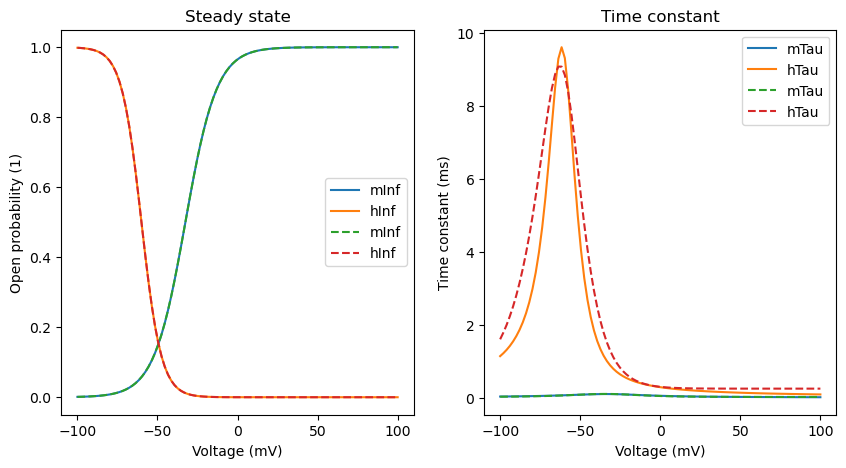

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
channel.plot_kinetic_variables(ax=ax)
standard_channel.plot_kinetic_variables(ax=ax, linestyle="--")